In [1]:
#!/usr/bin/env python
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from scipy.stats import norm

Extract relevant blocks for conditional distribution p(x1| x2 , x3, x4)

In [2]:
μₐ = 70
μᵦ = array([[100],[5],[8]])

In [3]:
Σₐₐ = 25
Σᵦᵦ = array([	[64,12,-3],
				[12,9,-1],
				[-3,-1,1]])

In [4]:
Σₐᵦ = array([[15,2,-4]])
xᵦ = array([[85,8,8]]).T

Compute conditional mean and covariance for p(x1| x2 , x3, x4)

In [5]:
Σᵦᵦˉᣳ = np.linalg.inv(Σᵦᵦ)
μₐӏᵦ = (μₐ + Σₐᵦ @ Σᵦᵦˉᣳ @ (xᵦ - μᵦ)).item()
σᒾ = Σₐӏᵦ = (Σₐₐ - Σₐᵦ @ Σᵦᵦˉᣳ @ Σₐᵦ.T).item()
σ = np.sqrt(σᒾ)  # Standard deviation

Grandmother's actual age

In [6]:
actual_age = 66  

Generate x1 values for plotting

In [7]:
ẋ = np.linspace(μₐӏᵦ - 3*σ, 
                      μₐӏᵦ + 3*σ, 100)

Compute probability density function

In [8]:
pₐӏᵦ = norm.pdf(ẋ, μₐӏᵦ, σ)

Plot the estimated biological age distribution

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(ẋ, pₐӏᵦ, label=r'$p(x_1 | x_2, x_3, x_4)$', color='blue')

Vertical line for grandmother's actual age

In [10]:
plt.axvline(x=actual_age, color='red', linestyle='--', label="Grandmother's Age (66)")

Vertical line for estimated biological age

In [11]:
plt.axvline(x=μₐӏᵦ, color='green', linestyle=':', label="Estimated Biological Age (67.1)")

Labels and legend

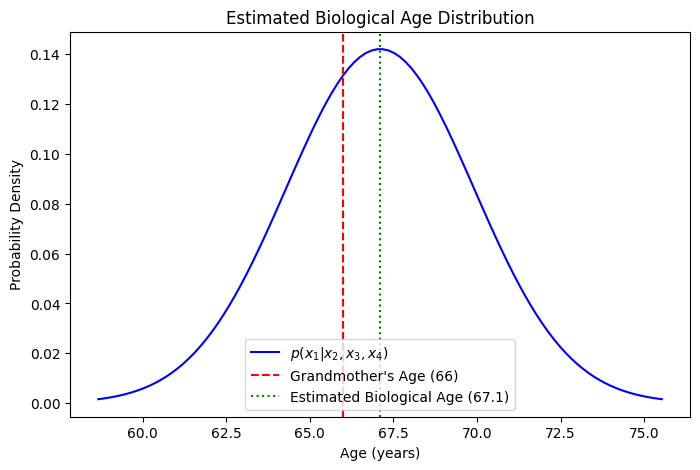

In [12]:
plt.xlabel("Age (years)")
plt.ylabel("Probability Density")
plt.title("Estimated Biological Age Distribution")
plt.legend()
plt.show()